In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
from Confocal_GUI.live_plot import change_to_inline, change_to_nbagg, enable_long_output, DataFigure
from Confocal_GUI.logic import ple, pl, live, odmr, GUI
from Confocal_GUI.device import VirtualScanner, VirtualCounter, VirtualWaveMeter, VirtualRF\
, VirtualLaserStabilizer, initialize_classes, VirtualPulse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [5]:
# initialize all classes and functions, bind them to devices wanted

# make sure that GUI() can output fig to jupyter notebook cell without being scrolled

config = {    
    'scanner': {'type': 'VirtualScanner'},
    'counter': {'type': 'VirtualCounter'},    
    'wavemeter': {'type': 'VirtualWaveMeter'},    
    'rf': {'type': 'VirtualRF'},
    'pulse': {'type': 'VirtualPulse'},
    'laser_stabilizer': {'type': 'VirtualLaserStabilizer','config_instances':'config_instances'},
        
}
# scanner, counter, laser_stabilizer_core, laser_stabilizer, wavemeter, laser etc. 
# are default keys for all functions to call objetive, 'type' defines bind which class
# or function to the key.


config_instances = initialize_classes(config, lookup_dict=globals(), namespace=globals())
config_instances = {**config_instances, **{'display_scale':1}}

# below are for test only
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
odmr_test_dict = {'odmr_height':10000, 'odmr_width':20e6, 'odmr_center':2.88e9}
config_instances={**config_instances, **pl_test_dict, **ple_test_dict, **odmr_test_dict}

scanner => <Confocal_GUI.device.base.VirtualScanner object at 0x000002B6092B9B88>
counter => <Confocal_GUI.device.base.VirtualCounter object at 0x000002B6092B9C08>
wavemeter => <Confocal_GUI.device.base.VirtualWaveMeter object at 0x000002B6092B9788>
rf => <Confocal_GUI.device.base.VirtualRF object at 0x000002B6092B9888>
pulse => <Confocal_GUI.device.base.VirtualPulse object at 0x000002B6092B9708>
laser_stabilizer => <Confocal_GUI.device.base.VirtualLaserStabilizer object at 0x000002B6092B9948>

Now you can call devices using e.g. config_instances["rf"].gui() or rf.gui()


In [3]:
pulse.gui()

In [60]:
data = [1,2,3]

In [42]:
103//2

51

In [12]:
help(pulse)

Help on VirtualPulse in module Confocal_GUI.device.base object:

class VirtualPulse(BasePulse)
 |  VirtualPulse class to simulate pulse control (e.g. pulse streamer),
 |  call pulse.gui() to access to all functions and pulse sequence editing
 |  
 |  notes:
 |  pulse duration, delay can be a int in ns or str contains 'x' which will be later replaced by self.x,
 |  therefore enabling fast pulse control by self.x = x and self.on_pulse() without reconfiguring self.data_matrix
 |  and sel.delay_array
 |  
 |  Save Pulse: save pulse sequence to self.data_matrix, self.delay_array but not in file
 |  Save to file: save pulse sequence to a .npz file
 |  
 |  Method resolution order:
 |      VirtualPulse
 |      BasePulse
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  gui(self, is_in_GUI=False)
 |  
 |  off_pulse(self)
 |  
 |  on_pulse(self)
 |  
 |  -----------------

In [6]:
GUI(config_instances=config_instances, measurement_PLE='odmr')

Plot stopped
PL started
Plot stopped
Plot stopped
PL started
Plot stopped
PL started
Plot stopped
ODMR started
Plot stopped
curve fitted, center = 2.87997
FWHM = 0.01982
height = -996.78478
bg = 996.51003
Plot stopped
Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'PL', 'plot_type': '2D', 'exposure': 0.01000000000000001, 'repeat': 2, 'wavelength': None, 'x_label': ['X', 'Y'], 'y_label': 'Counts/0.01s x2'}
Plot stopped
Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'PL', 'plot_type': '2D', 'exposure': 0.01000000000000001, 'repeat': 2, 'wavelength': None, 'x_label': ['X', 'Y'], 'y_label': 'Counts/0.01s x2'}
Plot stopped


Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'ODMR', 'plot_type': '1D', 'exposure': 0.1, 'repeat': 1, 'power': -10, 'scanner': (-6.0, -1.0), 'x_label': 'Frequency (GHz)', 'y_label': 'Counts/0.10s x1'}


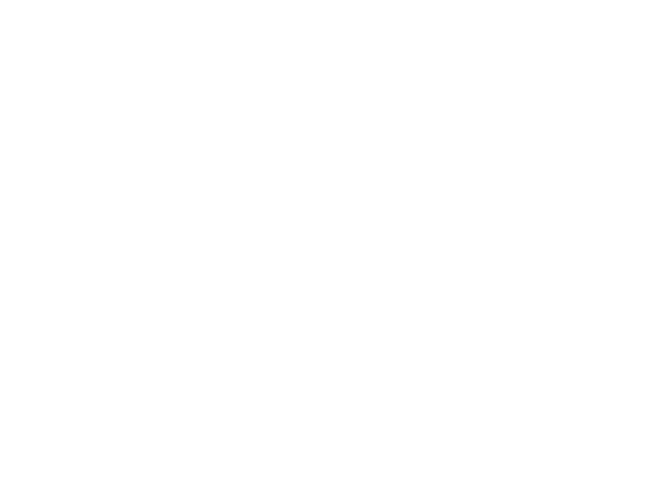

In [26]:
data_figure = DataFigure(None, address='2025_01_19/ODMR2025_01_19_18_37_24*')

In [27]:
data_figure.data_x

array([2.78 , 2.781, 2.782, 2.783, 2.784, 2.785, 2.786, 2.787, 2.788,
       2.789, 2.79 , 2.791, 2.792, 2.793, 2.794, 2.795, 2.796, 2.797,
       2.798, 2.799, 2.8  , 2.801, 2.802, 2.803, 2.804, 2.805, 2.806,
       2.807, 2.808, 2.809, 2.81 , 2.811, 2.812, 2.813, 2.814, 2.815,
       2.816, 2.817, 2.818, 2.819, 2.82 , 2.821, 2.822, 2.823, 2.824,
       2.825, 2.826, 2.827, 2.828, 2.829, 2.83 , 2.831, 2.832, 2.833,
       2.834, 2.835, 2.836, 2.837, 2.838, 2.839, 2.84 , 2.841, 2.842,
       2.843, 2.844, 2.845, 2.846, 2.847, 2.848, 2.849, 2.85 , 2.851,
       2.852, 2.853, 2.854, 2.855, 2.856, 2.857, 2.858, 2.859, 2.86 ,
       2.861, 2.862, 2.863, 2.864, 2.865, 2.866, 2.867, 2.868, 2.869,
       2.87 , 2.871, 2.872, 2.873, 2.874, 2.875, 2.876])

In [21]:
np.nan==np.nan

False

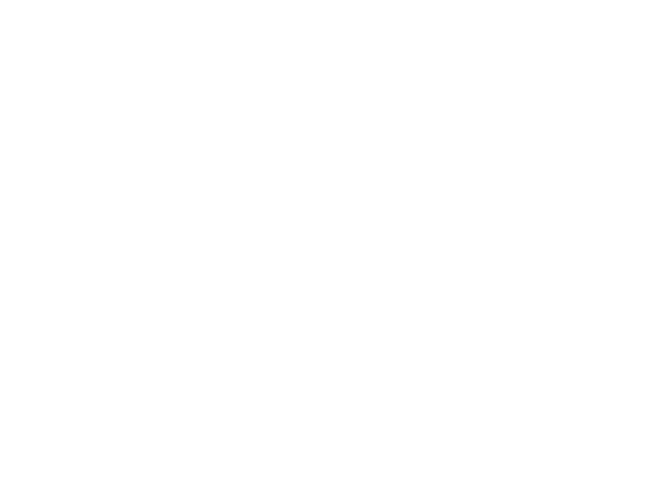

In [23]:
fig, data_figure = ple(data_x=np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances=config_instances\
                       , repeat=10, is_GUI=False)

Keys in npz file: ['data_x', 'data_y', 'info']
{'plot_type': 'PLE', 'exposure': 0.1, 'repeat': 1, 'power': -10, 'x_label': 'Frequency (GHz)', 'y_label': 'Counts/0.10s x1'}


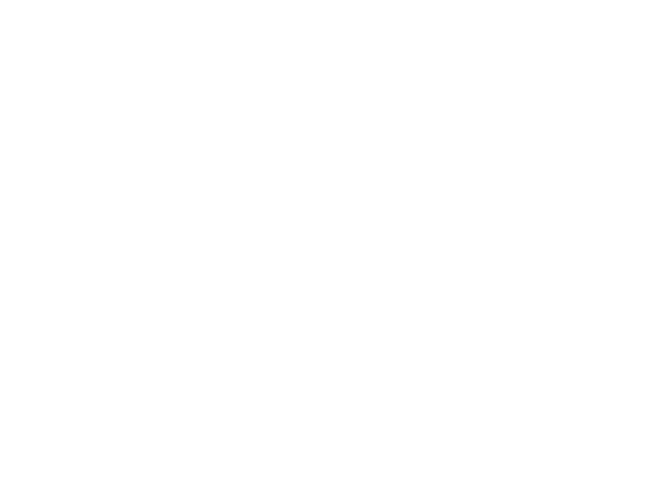

In [121]:
data_figure = DataFigure(None, address='2025_01_18/PLE2025_01_18_01_23_15*')

In [88]:
data_figure.data_x[0] - data_figure.data_x[1]

-0.0009999999999998899

In [109]:
_, popt = data_figure.lorent(p0=[ 2.87993285e+00 , 1.93784823e-02 ,-9.49230777e+02 , 9.48523948e+02], is_fit=False)

In [122]:
_, popt = data_figure.lorent()

In [79]:
a = []
np.argmin(a if a!=[] else [1,])

0

In [39]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
odmr_test_dict = {'odmr_height':10000, 'odmr_width':20e6, 'odmr_center':2.88e9}
# defines ple_test_dict for testing purpose only
fig, data_figure = ple(data_x=np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict, **odmr_test_dict}\
                       , repeat=1, is_GUI=True)

Plot stopped
PLE started
curve fitted, center = 737.102
FWHM = 0.00099
height = 10000.68115
bg = 6.54415
Plot stopped
PLE started
Plot stopped
curve fitted, center = 737.102
FWHM = 0.001
height = 10016.20307
bg = -0.21319
Plot stopped
Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'ODMR', 'plot_type': '1D', 'exposure': 0.1, 'repeat': 1, 'power': -10, 'scanner': (0, 0), 'x_label': 'Frequency (GHz)', 'y_label': 'Counts/0.10s x1'}
Plot stopped
Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'ODMR', 'plot_type': '1D', 'exposure': 0.1, 'repeat': 1, 'power': -10, 'scanner': (0, 0), 'x_label': 'Frequency (GHz)', 'y_label': 'Counts/0.10s x1'}
curve fitted, center = 2.87931
FWHM = 0.01951
height = -955.89705
bg = 996.80697
Plot stopped


In [39]:
for i, ii in enumerate([3,4,5]):
    print(i,ii)

0 3
1 4
2 5


In [48]:
_, popt = data_figure.lorent()

In [5]:
help(live)

Help on function live in module Confocal_GUI.logic.logic:

live(**kwargs)
    live func doc str



In [9]:
1200001%1000

1

In [11]:
int(-1001)//1000

-2

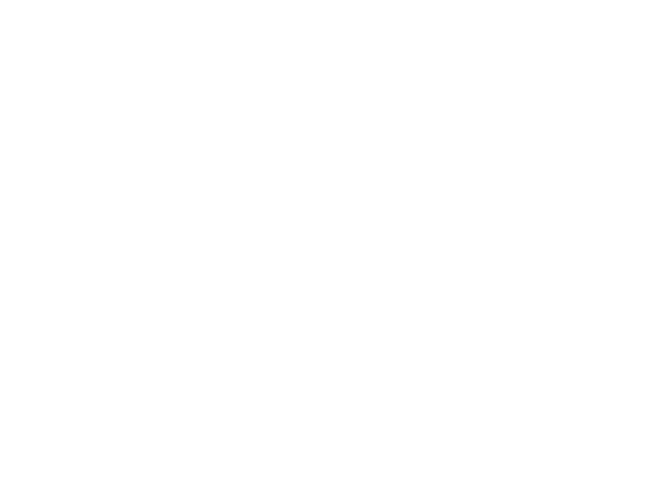

In [7]:
odmr_test_dict = {'odmr_height':10000, 'odmr_width':20e6, 'odmr_center':2.88e9}
# defines ple_test_dict for testing purpose only
fig, data_figure = odmr(data_x=np.arange(2.68, 3.08, 0.003), exposure=0.1, \
                                config_instances={**config_instances, **odmr_test_dict}, repeat=1, is_GUI=False, \
                        data_mode='single')

In [ ]:
odmr_test_dict = {'odmr_height':10000, 'odmr_width':20e6, 'odmr_center':2.88e9}
# defines ple_test_dict for testing purpose only
fig, data_figure = odmr(data_x=np.arange(2.68, 3.08, 0.003), exposure=0.1, \
                                config_instances={**config_instances, **odmr_test_dict}, repeat=1, \
                        is_GUI=True, data_mode='ref_sub')

Plot stopped
ODMR started
Plot stopped
Live started
Plot stopped
Live started


In [62]:
fig.axes[0].get_xlabel()

'Frequency (GHz)'

In [19]:
_, popt = data_figure.lorent()

[<confocal_gui.live_plot.AreaSelector object at 0x000002ADB40FB788>, <confocal_gui.live_plot.CrossSelector object at 0x000002ADB414BBC8>, <confocal_gui.live_plot.ZoomPan object at 0x000002ADB414BD48>]
737.0973308318617 737.1034591532452 2575.4107936507935 22006.704761904773


Live started
Keys in npz file: ['data_x', 'data_y', 'info']
{'data_generator': 'PLEAcquire', 'exposure': 0.1, 'repeat': 1}
curve fitted, center = 2.88018
FWHM = 0.02036
height = -999.77387
bg = 1002.15785
PLE started
PLE started
Plot stopped
saved fig as 2025_01_12/PLE2025_01_12_19_09_33.npz
info: {'plot_type': 'PLE', 'exposure': 0.1, 'repeat': 1}

        2025_01_12_19_09_33
        


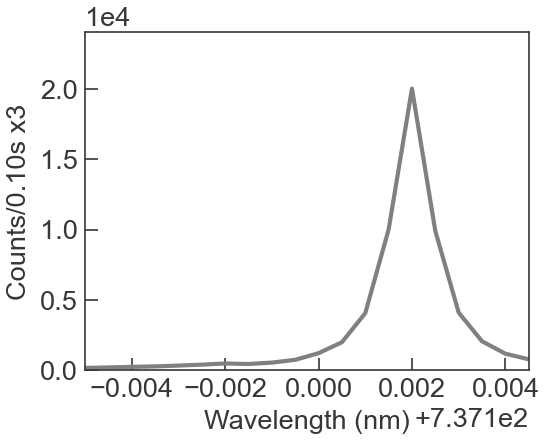

saved PLE
Keys in npz file: ['data_x', 'data_y', 'info']
{'data_generator': 'PLEAcquire', 'exposure': 0.1, 'repeat': 1, 'x_label': 'Frequency (GHz)', 'ylabel': 'Counts/0.10s x1'}


In [77]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
fig, data_figure = ple(data_x=np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict}, repeat=1, is_GUI=True)

In [78]:
x = [[1,2],[3,4]]
for i,ii in enumerate(x):
    print(i,ii)

0 [1, 2]
1 [3, 4]


In [82]:
x=[(1,2), (3,4), (5,6)]

In [83]:
np.shape(x)

(3, 2)

In [81]:
np.array(x).flatten()

array([1, 2, 3, 4])

In [19]:
np.zeros(np.shape([[1,2],[3,4]]))

array([[0., 0.],
       [0., 0.]])

In [5]:
# use mouse left to select/cancel area in fig
# use mouse middle to scroll range
# use mouse right to select point, or double clicks to remove point

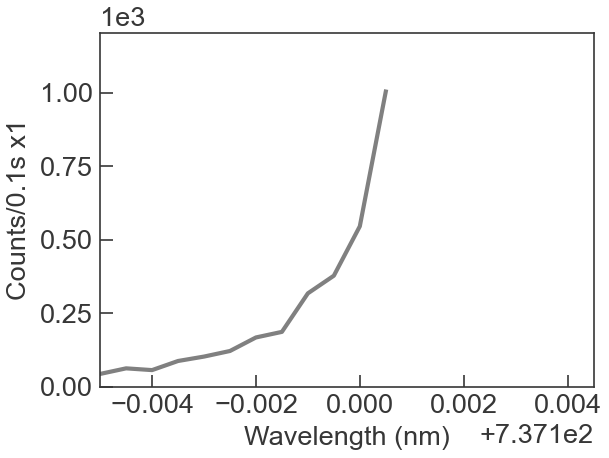

In [106]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
fig, data_figure = ple(data_x = np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict}, repeat=1, is_GUI=False)

In [5]:
data_figure.data
# get data from return data_figure
# data_figure is a instance of DataFigure 
# defines in confocal_gui.live_plot

[array([737.095 , 737.0955, 737.096 , 737.0965, 737.097 , 737.0975,
        737.098 , 737.0985, 737.099 , 737.0995, 737.1   , 737.1005,
        737.101 , 737.1015, 737.102 , 737.1025, 737.103 , 737.1035,
        737.104 , 737.1045]),
 array([  55.,   59.,   78.,   86.,  105.,  122.,  165.,  181.,  276.,
         396.,  601.,  966., 2085., 4975., 9960., 4939., 1948., 1003.,
         590.,  387.])]

In [6]:
data_figure.lorent()
# call lorent() to get a lorentzian fit

([['center', 'FWHM', 'in GHz', 'height', 'bg'],
  array([[ 3.15940408e-12, -1.02400427e-13,  5.82972619e-07,
           1.38147485e-07],
         [-1.02400427e-13,  1.78049365e-11, -4.62698587e-05,
          -1.62116735e-05],
         [ 5.82972619e-07, -4.62698587e-05,  7.09812489e+02,
          -4.33527014e+01],
         [ 1.38147485e-07, -1.62116735e-05, -4.33527014e+01,
           6.21867071e+01]])],
 array([7.37101997e+02, 9.97961643e-04, 5.50654734e-01, 9.94927842e+03,
        6.19041425e+00]))

In [10]:
data_figure.info

{'data_generator': 'PLEAcquire', 'exposure': 0.1, 'scanner': [0, 0]}

In [10]:
data_figure.save()
# save figure 

saved fig as PLE2024_06_28_01_59_15.npz


In [19]:
loaded = np.load('PLE2024_06_28_01_59_15.npz', allow_pickle=True)
keys = loaded.files
print("Keys in npz file:", keys)

for key in keys:
    print(f"Data under key '{key}':")
    print(loaded[key])

Keys in npz file: ['data_x', 'data_y', 'info']
Data under key 'data_x':
[737.095  737.0955 737.096  737.0965 737.097  737.0975 737.098  737.0985
 737.099  737.0995 737.1    737.1005 737.101  737.1015 737.102  737.1025
 737.103  737.1035 737.104  737.1045]
Data under key 'data_y':
[  42.   59.   60.   71.   85.  129.  145.  198.  271.  372.  577. 1032.
 2001. 4948. 9958. 4979. 1947.  976.  601.  415.]
Data under key 'info':
{'data_generator': 'PLEAcquire', 'exposure': 0.1, 'scanner': [0, 0]}


In [13]:
help(pl)

Help on function pl in module confocal_gui.live_plot:

pl(
    center,
    coordinates_x,
    coordinates_y,
    exposure,
    config_instances,
    is_dis=False,
    wavelength=None
)
    example

    >>> pl(center=[0, 0], coordinates_x=np.linspace(-5,5,10),         coordinates_y=np.linspace(-5,5,10), exposure=0.2)



In [40]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
# defines pl_test_dict for testing purpose only
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.025, \
                               config_instances={**config_instances, **pl_test_dict})

TypeError: load_params() got an unexpected keyword argument 'center'

In [ ]:
# can be interrupted by interrupt

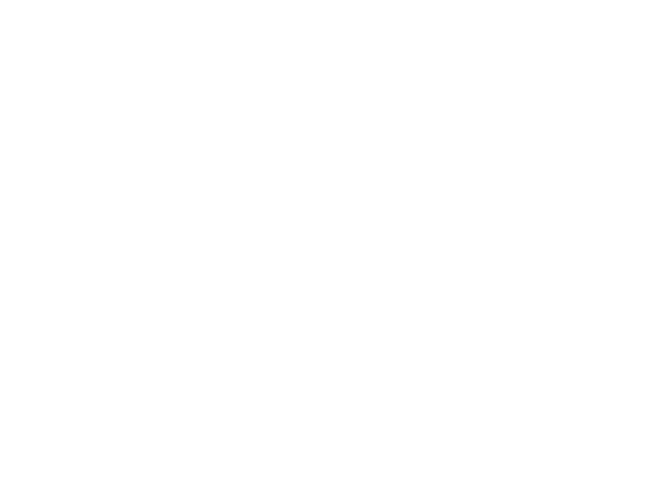

In [112]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(data_x = [np.arange(-20,20,1), np.arange(-20,20,1)], exposure=0.025, \
                      is_dis=False, config_instances={**config_instances, **pl_test_dict}, is_GUI=False)

In [ ]:
# drag two vertical lines in histogram to reset colorbar
# enables remove background

In [12]:
help(live)

Help on function live in module confocal_gui.live_plot:

live(data_array, exposure, config_instances, wavelength=None, is_finite=False)



In [79]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = live(data_x=np.arange(100), exposure=0.1, wavelength=None, 
                                           is_finite=True, config_instances={**config_instances, **pl_test_dict})
# wavelength defines wavelength for live plot

[autoreload of Confocal_GUI.live_plot.live_plot failed: Traceback (most recent call last):
  File "c:\users\eadri\appdata\local\programs\python\python37\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\eadri\appdata\local\programs\python\python37\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "c:\users\eadri\appdata\local\programs\python\python37\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "c:\users\eadri\appdata\local\programs\python\python37\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "c:\users\eadri\appdata\local\programs\python\python37\lib\site-packages\IPython\extensions\autoreload.py", line 278, in update_instances
    for ref in refs:
KeyboardInterrupt
]


TypeError: load_params() got an unexpected keyword argument 'wavelength'

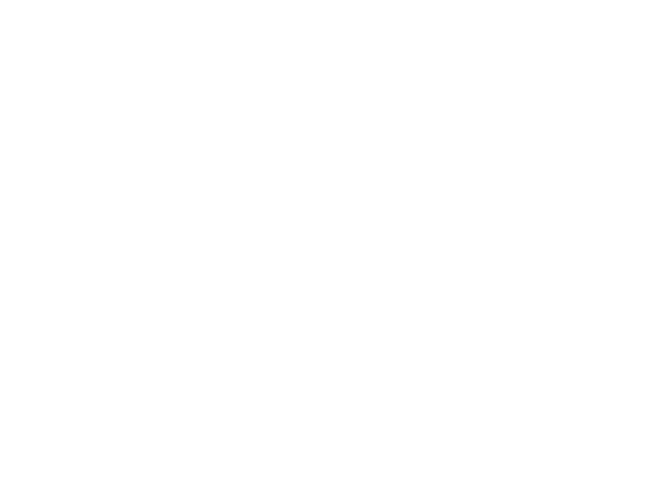

In [9]:
odmr_test_dict = {'odmr_height':10000, 'odmr_width':20e6, 'odmr_center':2.88e9}
fig, data_figure = live(data_x=np.arange(100), exposure=0.1, config_instances={**config_instances, **odmr_test_dict})

In [3]:
help(GUI)

Help on function GUI in module confocal_gui.gui:

GUI(config_instances)
    The function opens pyqt GUI for PLE, PL, live counts, and pulse control.
    Save button will also output data and figure to jupyter notebook.
    
    Examples
    --------
    >>> GUI()
    
    Read range button reads range from area created by mouse left 
    
        Read wavelength button reads wavelength from point created by mouse right in PLE
    
        Read XY button reads x, y coordinates from point created by mouse right in PL 
    
        Change unit changes PLE unit between 'nm' and 'GHz'
    
        Move sacnner moves scanner to x, y displayed



In [5]:
a=10

In [7]:
a.get(0)

AttributeError: 'int' object has no attribute 'get'

In [22]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
GUI(config_instances={**config_instances, **ple_test_dict, **pl_test_dict})

In [ ]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
GUI(config_instances={**config_instances, **ple_test_dict, **pl_test_dict})

In [4]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
GUI_PLE(config_instances={**config_instances, **ple_test_dict})

PLE started
scanner: (x=0, y=0)


In [3]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
gui_in_thread({**config_instances, **ple_test_dict}, GUI_PLE)

In [4]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}

gui_thread = Thread(target=GUI_PLE, kwargs={'config_instances': {**config_instances, **ple_test_dict}})
gui_thread.start()

PLE started
scanner: (x=0, y=0)


In [5]:
100/3

33.333333333333336

Plot stopped
curve fitted, center = 737.102
FWHM = 0.00101
in GHz = 0.55958
height = 9958.58873
bg = -20.1629


In [3]:
from threading import Thread
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}

gui_thread = Thread(target=GUI_PLE, kwargs={'config_instances': {**config_instances, **ple_test_dict}})
gui_thread.start()

PLE started
scanner: (x=0, y=0)
Plot stopped
PLE started
scanner: (x=0, y=0)
Plot stopped


In [9]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.10}
# defines pl_test_dict and ple_test_dict for testing
GUI(config_instances={**config_instances, **pl_test_dict, **ple_test_dict, **{'display_scale':1}})

PLE started
scanner: (x=-10, y=-18)
Plot stopped
PLE started
scanner: (x=-10, y=-18)
Plot stopped
PLE range updated
PLE started
scanner: (x=-10, y=-18)
Plot stopped
curve fitted, center = 737.1
FWHM = 0.001
in GHz = 0.55368
height = 9952.03954
bg = -1.33853


Text(0, 0.5, 'y')

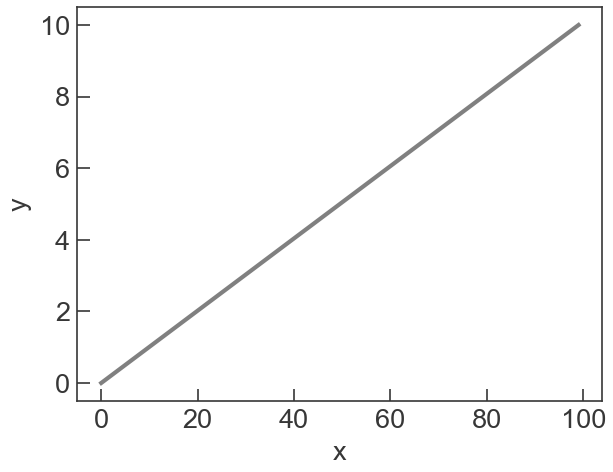

In [10]:
change_to_inline(params_type = 'inline', scale=1) 
# go back to inline backend otherwise display error
plt.close()
plt.tight_layout()
plt.plot(np.linspace(0, 10, 100), color='grey')
plt.xlabel('x')
plt.ylabel('y')

In [12]:
import pyvisa
rm = pyvisa.ResourceManager()

In [14]:
rm.list_resources()

('USB0::0x1AB1::0x099C::DSG8M267M00006::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR')

In [17]:
inst = rm.open_resource('USB0::0x1AB1::0x099C::DSG8M267M00006::INSTR')

In [18]:
inst.query("*IDN?")

'Rigol Technologies,DSG836,DSG8M267M00006,00.01.07\n'

In [21]:
from confocal_gui.device import DSG836

In [28]:
handle.query('SOURce:Power?')

'-110.00\n'

In [11]:
import nidaqmx, time

In [61]:
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    task.timing.cfg_samp_clk_timing(10.0, sample_mode=nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=10)
    while 1:
        time.sleep(0.1)
        t0 = time.time()
        data = task.read(nidaqmx.constants.READ_ALL_AVAILABLE)
        #print(time.time()-t0)
        print(data)
        #print(data, end='\r')

[0.030208686449488688, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030208686449488688, 0.030208686449488688, 0.030208686449488688, 0.030208686449488688]
[0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030048782568745883]
[0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030048782568745883, 0.030208686449488688]
[0.030208686449488688, 0.030208686449488688, 0.030208686449488688, 0.030528494211214934, 0.030528494211214934, 0.030528494211214934, 0.030368590330311716, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688]
[0.030208686449488688, 0.030368590330311716, 0.030368590330311716, 0.030208686449488688, 0.030368590330311716, 0.030

KeyboardInterrupt: 

In [12]:
task =  nidaqmx.Task()
task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
task.timing.cfg_samp_clk_timing(1000.0, sample_mode=nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=1000)


while(1):
    t00 = time.time()
    task.stop()
    task.start()
    t1 = time.perf_counter()
    time.sleep(0.1)
    t0 = time.time()
    data = task.read(nidaqmx.constants.READ_ALL_AVAILABLE)
    print(time.perf_counter()-t1)
    #print(time.time()-t00)
    #print(data)
    #print(data, end='\r')

1.0110930000664666
0.9997023999458179


KeyboardInterrupt: 

In [13]:
task.stop()

In [14]:
task.close()

In [23]:
task is None

False

In [24]:
task.is_task_done()

DaqError: Task specified is invalid or does not exist.
Status Code: -200088

In [9]:
int(1000*0.1523123)

152

In [4]:
counter = USB6346()

In [5]:
counter.exposure

1

In [6]:
import time
t0 = time.time()
counter.read_counts(1, None)
print(time.time()-t0)

1.0468475818634033


In [12]:
float(np.average([1.02, 2.04, 55.2]))

19.42

In [21]:
counter.exit_handler()

In [20]:
counter.task_counter_ai.timing.cfg_samp_clk_timing(1000.0, sample_mode=nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=1000)

DaqError: Specified property cannot be set while the task is running.
Set the property prior to starting the task, or stop the task prior to setting the property.

Property: DAQmx_SampTimingType

Task Name: _unnamedTask<8>

Status Code: -200557

In [12]:
counter

In [13]:
hasattr(counter, '__bases__')

False

In [15]:
hasattr(counter, '__call__')

False

In [17]:
hasattr(counter.read_counts, '__bases__')

False

In [18]:
hasattr(counter.read_counts, '__call__')

True

In [19]:
config_instances

{'scanner': <confocal_gui.virtual_device.VirtualScanner at 0x18bf5622e40>,
 'counter': <function confocal_gui.virtual_device.virtual_read_counts(duration, parent)>,
 'rf': <confocal_gui.device.DSG836 at 0x18b88c2a270>,
 'laser_stabilizer_core': <confocal_gui.logic.VirtualLaserStabilizerCore at 0x18b88c946e0>,
 'laser_stabilizer': <LaserStabilizer(Thread-3, initial daemon)>,
 'display_scale': 1}

In [7]:
config_instances['counter'] = counter.read_counts

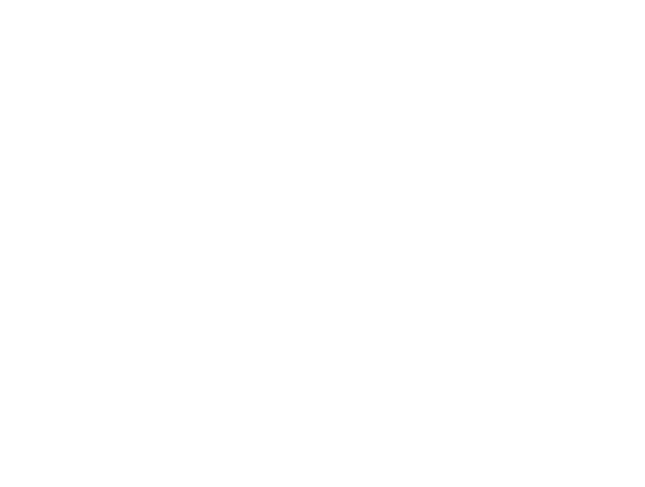

In [10]:
fig, data_figure = live(np.arange(100), exposure=0.1, wavelength=None, 
                                           is_finite=False, config_instances={**config_instances})
# wavelength defines wavelength for live plot

In [7]:
config_instances['counter'](1, None)

0.01783516449266453

In [8]:
rf = config_instances['rf']

In [9]:
rf.frequency

2395000000.0

In [13]:
rf.power = -10

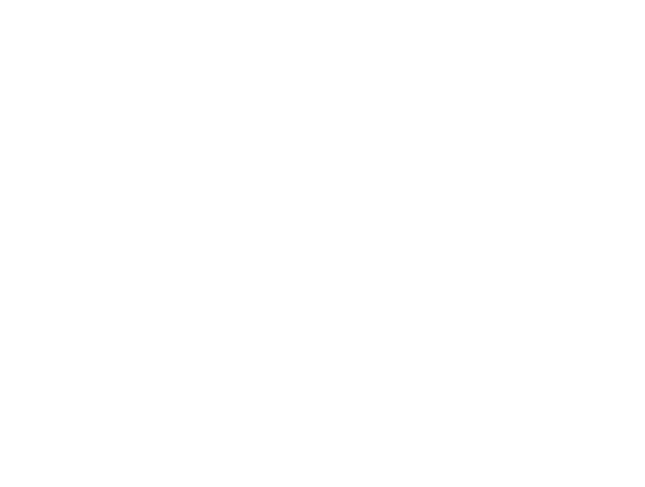

In [22]:
fig, data_figure = odmr(np.arange(2.77e9, 2.97e9, 1e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

In [23]:
data_figure.save('odmr_test_ensemble')

saved fig as odmr_test_ensemblePLE2024_12_20_17_26_42.npz


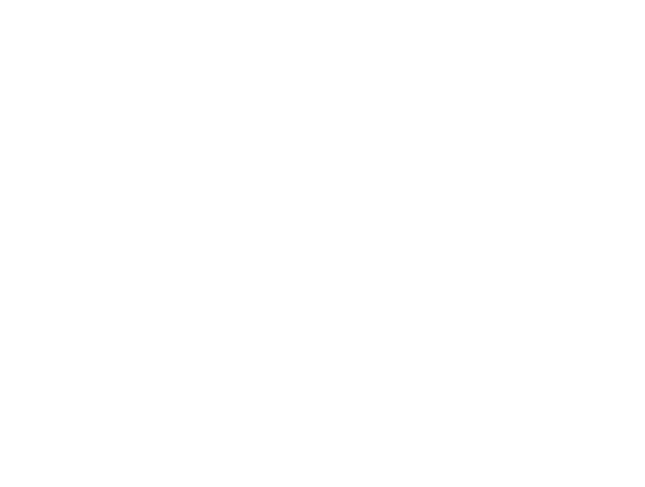

In [24]:
fig, data_figure = odmr(np.arange(2.77e9, 2.97e9, 1e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

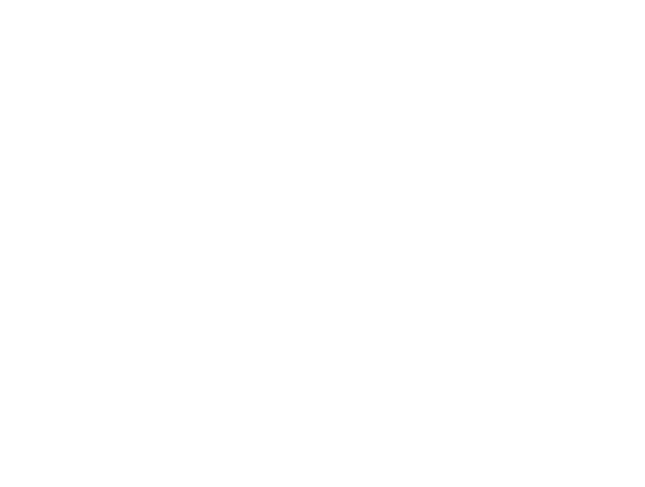

In [27]:
fig, data_figure = odmr(np.arange(2.27e9, 3.47e9, 5e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

In [28]:
data_figure.save('odmr_test_ensemble')

saved fig as odmr_test_ensemblePLE2024_12_20_17_33_20.npz


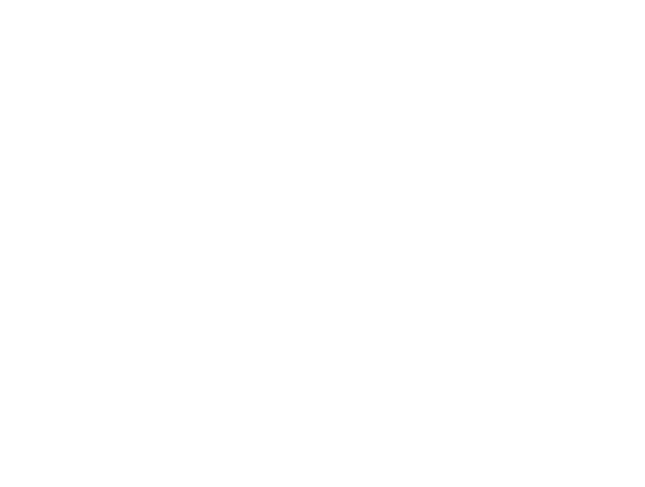

In [16]:
fig, data_figure = odmr(np.arange(2.27e9, 3.47e9, 5e6), exposure=0.1, power=-10, \
                                config_instances={**config_instances})

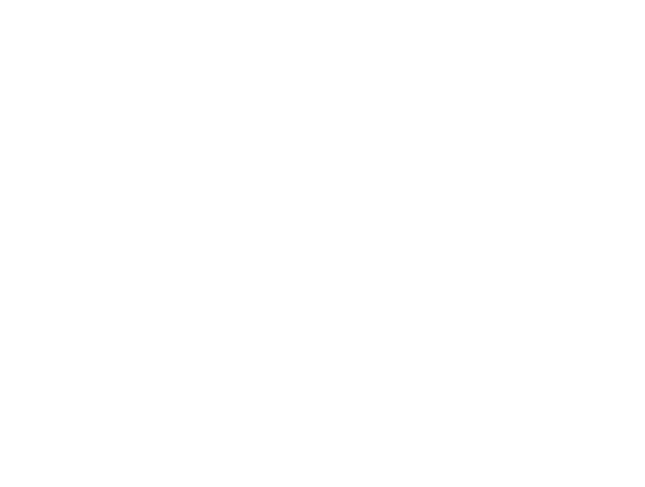

In [17]:
fig, data_figure = odmr(np.arange(2.67e9, 3.07e9, 1e6), exposure=0.1, power=-20, \
                                config_instances={**config_instances})

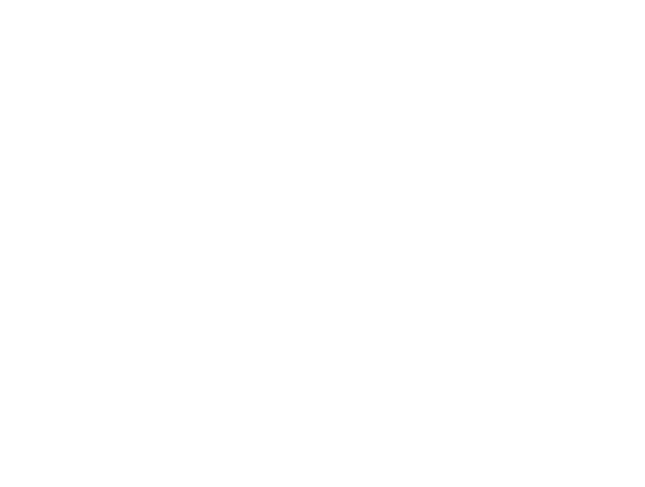

In [18]:
fig, data_figure = odmr(np.arange(2.82e9, 2.92e9, 0.2e6), exposure=0.1, power=-25, \
                                config_instances={**config_instances})

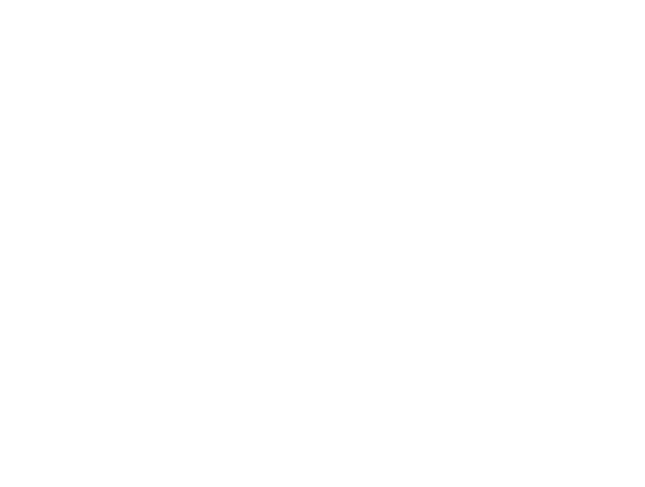

In [19]:
fig, data_figure = odmr(np.arange(2.82e9, 2.92e9, 0.2e6), exposure=0.1, power=-30, \
                                config_instances={**config_instances})

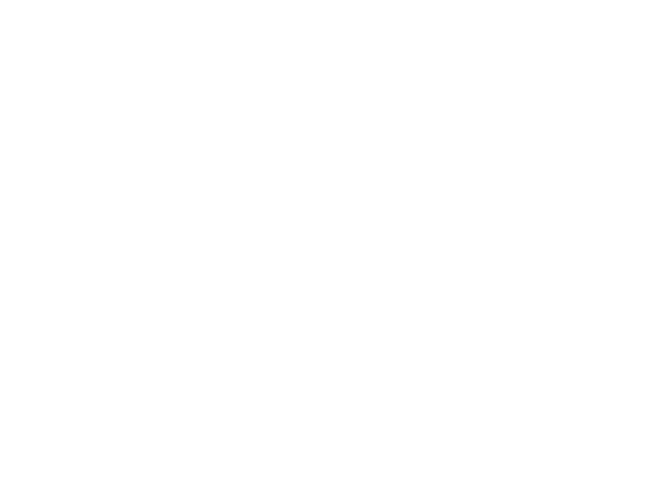

In [34]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(data_x = [np.arange(-10, 10), np.arange(-10, 10)], exposure=0.1, \
                                config_instances={**config_instances, **pl_test_dict}, is_dis=False, repeat=1)

In [47]:
fig.axes[0].images[0].colorbar.labels

AttributeError: 'Colorbar' object has no attribute 'labels'

In [48]:
fig.axes[0].images[0].colorbar.ax.yaxis.label.get_text()

'a'

In [7]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(data_x = [np.arange(-10, 10), np.arange(-10, 10)], exposure=0.1, \
                                config_instances={**config_instances, **pl_test_dict}, is_dis=True, repeat=2, is_GUI=True)

PL started
Live started
Plot stopped
Live started
Plot stopped
Live started
Plot stopped
Live started
Plot stopped
Live started
Plot stopped
Live started
Live started
Live started
Live started


In [14]:
config_instances['wavemeter'].wavelength 

0

In [19]:
x=np.array([np.arange(-10, 20, 1), np.arange(-10, 20, 1)])

In [21]:
x

array([[-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19]])

In [22]:
len(x)

2

In [17]:
for i, xx in enumerate(x[0]):
    print(i, xx)

0 -10
1 -9
2 -8
3 -7
4 -6
5 -5
6 -4
7 -3
8 -2
9 -1
10 0
11 1
12 2
13 3
14 4
15 5
16 6
17 7
18 8
19 9
20 10
21 11
22 12
23 13
24 14
25 15
26 16
27 17
28 18
29 19


In [13]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton
from threading import Thread
from PyQt5 import QtCore, QtWidgets
from PyQt5.QtWidgets import QHBoxLayout, QWidget, QPushButton, QLabel, QLineEdit, QDoubleSpinBox, QSizePolicy
from PyQt5.QtCore import QThread, pyqtSignal

# 简单的 PyQt GUI 示例
class MyGUI(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Pulse Timing GUI")
        self.setGeometry(100, 100, 400, 300)
        
        self.button = QPushButton("Click me", self)
        self.button.clicked.connect(self.on_button_click)
        self.button.setGeometry(150, 130, 100, 40)
        self.show()
        
    def on_button_click(self):
        print("Button clicked!")
        
    def closeEvent(self, event):
        # 让 QApplication 的事件循环退出
        QApplication.quit()
        event.accept()

# 在新线程中运行 PyQt 应用程序
def run_app():
    if hasattr(QtCore.Qt, 'AA_EnableHighDpiScaling'):
        QtWidgets.QApplication.setAttribute(QtCore.Qt.AA_EnableHighDpiScaling, True)

    if hasattr(QtCore.Qt, 'AA_UseHighDpiPixmaps'):
        QtWidgets.QApplication.setAttribute(QtCore.Qt.AA_UseHighDpiPixmaps, True)
        
    
    app = QtCore.QCoreApplication.instance()
    if app is None:
        app = QtWidgets.QApplication(sys.argv)

    w = MyGUI()
    #w.show()
    app.setStyle('Windows')
    try:
        sys.exit(app.exec_())
    except SystemExit as se:
        if se.code != 0:
            raise se

# 在 Jupyter Notebook 中调用
def start_gui_in_thread():
    gui_thread = Thread(target=run_app)
    gui_thread.start()

# 调用该函数以启动 GUI

In [15]:
start_gui_in_thread()

In [9]:
100/3

33.333333333333336

In [5]:
from confocal_gui.gui import MainWindow_PLE

def GUI_PLE(config_instances):
    from threading import Thread
    """
    The function opens pyqt GUI for PLE, PL, live counts, and pulse control.
    Save button will also output data and figure to jupyter notebook.
   
    Examples
    --------
    >>> GUI()

    Read range button reads range from area created by mouse left 

    Read wavelength button reads wavelength from point created by mouse right in PLE

    Read XY button reads x, y coordinates from point created by mouse right in PL 

    Change unit changes PLE unit between 'nm' and 'GHz'

    Move sacnner moves scanner to x, y displayed 
    """

    def GUI_handler():

        if hasattr(QtCore.Qt, 'AA_EnableHighDpiScaling'):
            QtWidgets.QApplication.setAttribute(QtCore.Qt.AA_EnableHighDpiScaling, True)

        if hasattr(QtCore.Qt, 'AA_UseHighDpiPixmaps'):
            QtWidgets.QApplication.setAttribute(QtCore.Qt.AA_UseHighDpiPixmaps, True)
            
        
        app = QtCore.QCoreApplication.instance()
        if app is None:
            app = QtWidgets.QApplication(sys.argv)

        w = MainWindow_PLE(config_instances)
        app.setStyle('PLE GUI')
        try:
            sys.exit(app.exec_())
        except SystemExit as se:
            if se.code != 0:
                raise se
        # make sure jupyter notebook does not catch error when exit normally


    gui_thread = Thread(target=GUI_handler)
    gui_thread.start()
    #GUI_handler()

In [6]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
GUI_PLE(config_instances={**config_instances, **ple_test_dict})

PLE started
scanner: (x=0, y=0)
Plot stopped
PLE started
scanner: (x=0, y=0)
Plot stopped
curve fitted, center = 737.102
FWHM = 0.00101
in GHz = 0.5556
height = 9958.28763
bg = -1.79294


In [1]:
import sys
from PyQt5.QtWidgets import (
    QApplication, QMainWindow, QWidget, QHBoxLayout, QVBoxLayout, 
    QLabel, QPushButton, QGroupBox, QSpinBox, QFrame
)
from PyQt5.QtCore import (
    Qt, QMimeData
)
from PyQt5.QtGui import (
    QDrag, QPixmap
)


class DraggableItem:
    """
    Save properties
    """
    def __init__(self, widget, item_type):
        self.widget = widget
        self.item_type = item_type
        if self.item_type != 'pulse':
            self.widget.setStyleSheet("QGroupBox { border: 2px solid grey; }")


class DragContainer(QWidget):
    """
    Drag container for dragable bracket in pulse control gui
    """
    def __init__(self, parent=None):
        super().__init__(parent)
        self.setAcceptDrops(True)

        self.layout_main = QHBoxLayout(self)
        self.layout_main.setSpacing(20)
        self.items = []

        self.dragStartPos = None
        self.draggingIndex = None

        # maintain a indicator between containers but hide 
        self.insert_indicator = QFrame()
        self.insert_indicator.setFrameShape(QFrame.VLine)
        self.insert_indicator.setFrameShadow(QFrame.Raised)
        self.insert_indicator.setStyleSheet("QFrame { background-color: grey; width: 2px; }")
        self.insert_indicator.hide()

    def add_item(self, widget, item_type):
        it = DraggableItem(widget, item_type)
        self.items.append(it)
        self.layout_main.addWidget(widget)

    def insert_item(self, index, widget, item_type):
        it = DraggableItem(widget, item_type)
        self.items.insert(index, it)
        self.refresh_layout()

    def refresh_layout(self):
        # remove all widget
        while self.layout_main.count() > 0:
            c = self.layout_main.takeAt(0)
            w = c.widget()
            if w:
                w.setParent(None)
        # reinsert follows order
        for it in self.items:
            self.layout_main.addWidget(it.widget)
        # add end indicator
        self.layout_main.addWidget(self.insert_indicator)
        self.insert_indicator.hide()

    def index_of_widget(self, w):
        for i, it in enumerate(self.items):
            if it.widget == w:
                return i
        return -1

    # ========== Drag & Drop ==========
    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.dragStartPos = event.pos()
            clicked_index = self.find_child_index_by_pos(event.pos())
            if clicked_index != -1:
                self.draggingIndex = clicked_index
        super().mousePressEvent(event)

    def mouseMoveEvent(self, event):
        if (event.buttons() & Qt.LeftButton) and self.dragStartPos is not None:
            distance = (event.pos() - self.dragStartPos).manhattanLength()
            if distance > QApplication.startDragDistance():
                if self.draggingIndex is not None:
                    self.startDrag(self.draggingIndex)
                    self.draggingIndex = None
                    self.dragStartPos = None
        super().mouseMoveEvent(event)

    def startDrag(self, index):
        drag = QDrag(self)
        mime = QMimeData()
        mime.setData("application/x-drag-bracket", str(index).encode("utf-8"))
        drag.setMimeData(mime)

        # highlight selected drag container
        self.index = index
        self.items[self.index].widget.setStyleSheet("QGroupBox { border: 2px solid red; }")

        # screentshot selected container
        pixmap = QPixmap(self.items[self.index].widget.size())
        self.items[self.index].widget.render(pixmap)
        drag.setPixmap(pixmap)

        dropAction = drag.exec_(Qt.MoveAction)

        # end of drag
        self.items[self.index].widget.setStyleSheet("QGroupBox { border: 2px solid grey; }")

    def dragEnterEvent(self, event):
        if event.mimeData().hasFormat("application/x-drag-bracket"):
            event.acceptProposedAction()
        else:
            super().dragEnterEvent(event)

    def dragMoveEvent(self, event):
        if event.mimeData().hasFormat("application/x-drag-bracket"):
            event.acceptProposedAction()
            # pos of drag
            insert_pos = self.get_item_at_pos(event.pos())
            self.show_insert_indicator(insert_pos)
        else:
            super().dragMoveEvent(event)

    def dropEvent(self, event):
        if event.mimeData().hasFormat("application/x-drag-bracket"):
            # 1) get item of drag container
            raw_data = event.mimeData().data("application/x-drag-bracket")
            old_bytes = bytes(raw_data)
            old_index = int(old_bytes.decode("utf-8"))
            dragged_item = self.items[old_index]

            # 2) new pos
            insert_pos = self.get_item_at_pos(event.pos())
            # 3) new item array
            new_items = self.items[:]             
            new_items.remove(dragged_item)
            if insert_pos > old_index:
                insert_pos -= 1
            new_items.insert(insert_pos, dragged_item)

            # 4) check constarin
            if not self.check_bracket_constraints(new_items):
                event.ignore()
                self.insert_indicator.hide()
                return
            else:
                event.setDropAction(Qt.MoveAction)
                event.accept()
                self.index = insert_pos
                self.items = new_items
                self.refresh_layout()
                self.insert_indicator.hide()

        else:
            super().dropEvent(event)


    def dragLeaveEvent(self, event):
        self.insert_indicator.hide()
        super().dragLeaveEvent(event)

    # ========== sub functions ==========
    def find_child_index_by_pos(self, pos):
        for i, it in enumerate(self.items):
            if it.widget.geometry().contains(pos):
                return i
        return -1

    def get_item_at_pos(self, pos):
        x = pos.x()
        for i, it in enumerate(self.items):
            w = it.widget
            geo = w.geometry()
            mid = geo.x() + geo.width() // 2
            if x < mid:
                return i
        return len(self.items)

    def show_insert_indicator(self, index):
        self.layout_main.removeWidget(self.insert_indicator)
        self.layout_main.insertWidget(index, self.insert_indicator)
        self.insert_indicator.show()

    def check_bracket_constraints(self, item_list=None):
        if item_list is None:
            item_list = self.items  

        start_idx = None
        end_idx = None
        for i, it in enumerate(item_list):
            if it.item_type == "bracket_start":
                start_idx = i
            elif it.item_type == "bracket_end":
                end_idx = i

        if start_idx is not None and end_idx is not None:
            # 1) end must larger than start
            if end_idx <= start_idx:
                return False
            # 2) at least two pulses away
            if end_idx < start_idx + 3:
                return False

        return True


class MainWindow(QMainWindow):
    """
    Main window that demonstrates the DragContainer usage 
    with a single pair of brackets and multiple pulses.
    """
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Drag & Drop Single Bracket Demo")
        self.bracket_exists = False

        self.drag_container = DragContainer()

        # ========= Top buttons =========
        top_widget = QWidget()
        top_layout = QHBoxLayout(top_widget)

        btn_add_pulse = QPushButton("Add Pulse")
        btn_add_pulse.clicked.connect(self.on_add_pulse)
        top_layout.addWidget(btn_add_pulse)

        self.btn_add_bracket = QPushButton("Add Bracket")
        self.btn_add_bracket.clicked.connect(self.on_add_bracket)
        top_layout.addWidget(self.btn_add_bracket)

        btn_print = QPushButton("Print Items")
        btn_print.clicked.connect(self.on_print_items)
        top_layout.addWidget(btn_print)

        top_layout.addStretch()

        # ========= Main layout =========
        main_widget = QWidget()
        main_layout = QVBoxLayout(main_widget)
        main_layout.addWidget(top_widget)
        main_layout.addWidget(self.drag_container)

        self.setCentralWidget(main_widget)
        self.resize(900, 400)

        # By default, add some pulse items
        for _ in range(3):
            self.on_add_pulse()

    def on_add_pulse(self):
        """
        Add a pulse QGroupBox to the end.
        """
        box = QGroupBox("Pulse")
        layout = QVBoxLayout(box)
        layout.addWidget(QLabel("This is a pulse."))
        self.drag_container.add_item(box, "pulse")

    def on_add_bracket(self):
        """
        If brackets do not exist yet:
          1) Find the first pulse index and the last pulse index.
          2) Insert the start bracket right before the first pulse.
          3) Insert the end bracket right after the last pulse.
        If brackets already exist, remove them.
        """
        if not self.bracket_exists:
            # 1) Identify the indices of the first and last pulse
            first_pulse_index = 0
            last_pulse_index = len(self.drag_container.items)
        

            # 2) Create the start bracket widget
            start_box = QGroupBox("StartBracket")
            vb1 = QVBoxLayout(start_box)
            vb1.addWidget(QLabel("[StartBracket]"))

            # 3) Create the end bracket widget
            end_box = QGroupBox("EndBracket")
            vb2 = QVBoxLayout(end_box)
            vb2.addWidget(QLabel("[EndBracket]"))
            sp = QSpinBox()
            sp.setRange(1, 999)
            sp.setValue(2)
            vb2.addWidget(sp)

            # -- Inserting the brackets --
            # NOTE: Insert the end bracket first so the index of the first pulse won't shift.
            #       We want the end bracket after the last pulse, so its index is last_pulse_index + 1.
            #self.drag_container.insert_item(last_pulse_index + 1, end_box, "bracket_end")

            # Now insert the start bracket right before the first pulse (no shift occurs yet).
            self.drag_container.insert_item(0, start_box, "bracket_start")
            self.drag_container.insert_item(len(self.drag_container.items), end_box, "bracket_end")
            #self.drag_container.refresh_layout()

            # Toggle flag and button text
            self.bracket_exists = True
            self.btn_add_bracket.setText("Delete Bracket")

        else:
            # Remove the bracket items only, leaving pulses intact
            self.delete_bracket_only()
            self.bracket_exists = False
            self.btn_add_bracket.setText("Add Bracket")


    def delete_bracket_only(self):
        """
        Remove items of type 'bracket_start' and 'bracket_end', keeping only pulses.
        """
        new_list = []
        for it in self.drag_container.items:
            if it.item_type not in ("bracket_start", "bracket_end"):
                new_list.append(it)
        self.drag_container.items = new_list
        self.drag_container.refresh_layout()

    def on_print_items(self):
        """
        Print the current sequence of items (by their type) for debugging.
        """
        types = [it.item_type for it in self.drag_container.items]
        print("Current items:", types)


if __name__ == "__main__":
    app = QApplication(sys.argv)
    w = MainWindow()
    w.show()
    try:
        sys.exit(app.exec_())
    except SystemExit as se:
        if se.code != 0:
            raise se


In [7]:
change_to_inline('nbagg', 1)

In [20]:
data_y = np.array([(1,2), (2,3), (3,4), np.nan])

In [22]:
data_y[:3]

array([(1, 2), (2, 3), (3, 4)], dtype=object)

In [17]:
data_y = np.array([(1,2), (2,3), (3,4)], dtype=object)
len(data_y.flatten())

6

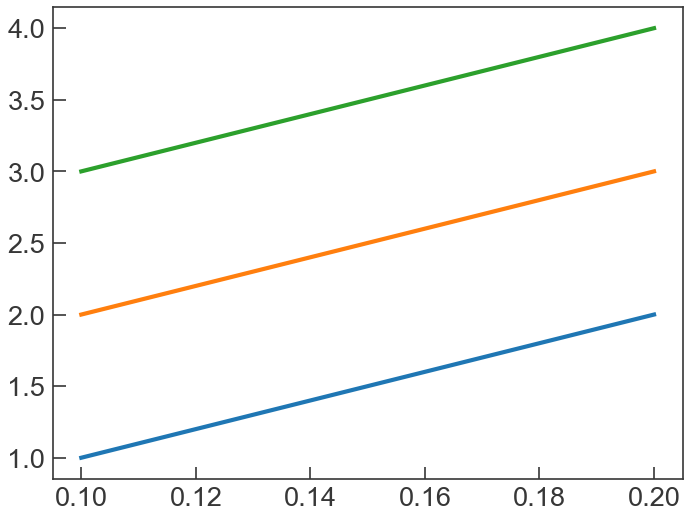

In [25]:
plt.plot([0.1, 0.2, 0.3, 0.4], [(1,2,3), (2,3,4), (np.nan, np.nan, np.nan), (np.nan, np.nan, np.nan)])

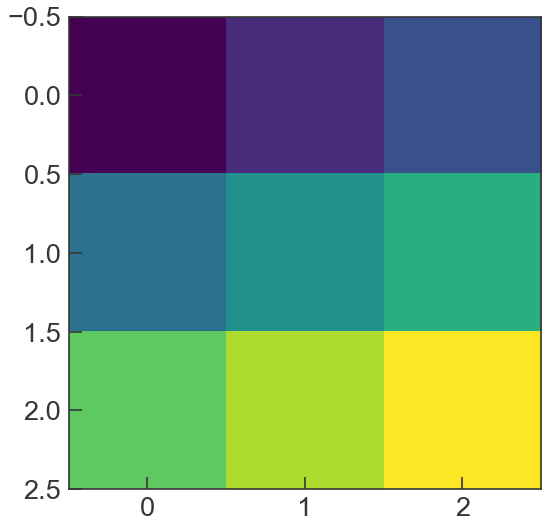

In [50]:
line = plt.imshow([[1,2,3],[4,5,6],[7,8,9]])

In [52]:
.get_xlim()

TypeError: 'AxesImage' object is not subscriptable

In [17]:
np.zeros((4,4)).flatten()[:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [176]:
line.set_array([[1,2,3],[4,5,6], [7,8,0]])

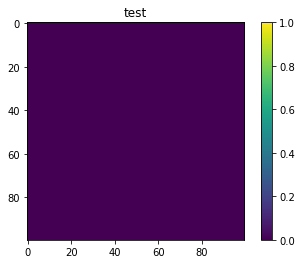

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化图像数据，假设图像大小为100x100
img_size = (100, 100)
data = np.zeros(img_size)

# 创建图形和轴
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(im, ax=ax)
ax.set_title('test')
plt.ion()  # 开启交互模式
plt.show()

# 示例点数据（x, y 坐标）
points = [(10, 10), (20, 30), (50, 50), (70, 80), (90, 20), (30, 60), (80, 40), (25, 75), (60, 10), (85, 95)]

# 动态添加点
for point in points:
    x, y = point
    if 0 <= x < img_size[0] and 0 <= y < img_size[1]:
        data[x, y] = 1  # 设置点的值，例如设为1
        im.set_data(data)  # 更新图像数据
        im.autoscale()  # 可选：自动缩放颜色范围
        fig.canvas.draw_idle()
        plt.pause(0.5)  # 暂停以显示更新

plt.ioff()  # 关闭交互模式
plt.show()


In [2]:
a = np.zeros((4,4)).flatten()

In [3]:
a.reshape((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

(array([ 6.,  8., 11.,  8., 11., 13., 11.,  9., 10., 13.]),
 array([0.01143545, 0.10713528, 0.20283511, 0.29853493, 0.39423476,
        0.48993459, 0.58563442, 0.68133425, 0.77703408, 0.8727339 ,
        0.96843373]),
 <BarContainer object of 10 artists>)

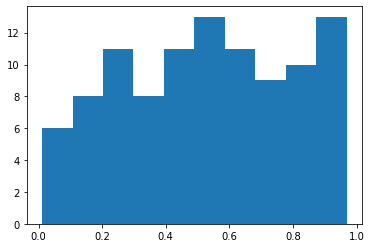

In [7]:
plt.hist(np.random.random(100))

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

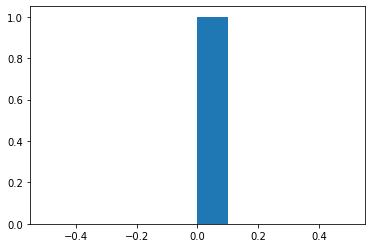

In [8]:
plt.hist([0,])

In [25]:
np.max((1,2))

2